# Classification

## Logistic Regression

In [154]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import collections  as mc
%load_ext autoreload
%autoreload 2
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
sns.set_style("white")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Important!

__For all the questions below, fix the seed of random generators to 72.__

In [155]:
np.random.seed = 72

### Load data

Tele-costumer-churn data-set. (you can download it from [here](https://www.kaggle.com/blastchar/telco-customer-churn))

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

> 1. Customers who left within the last month – the column is called Churn
> 2. Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
> 3. Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
> 4. Demographic info about customers – gender, age range, and if they have partners and dependents

In [156]:
# find the link to the raw data from github
df = pd.read_csv("data/customer churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [157]:
df.shape

(7043, 21)

In [158]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

For some of the data points there is no `TotalCharges` value. We need to find these data points and remove them.

In [159]:
z = df["TotalCharges"].map(lambda x: x.replace('.', '', 1).isdigit())
df = df[z]

In [160]:
df.reset_index(inplace=True)
df.shape

(7032, 22)

In [161]:
df["TotalCharges"] = df["TotalCharges"].astype(float)

### base rate
What is the base rate?

In [162]:
# base rate
churn_counts = df['Churn'].value_counts()
base_rate = churn_counts['No'] / churn_counts.sum()
base_rate

0.7342150170648464

### Training

Train a logistic regression on this data-set. Use these set of features: "tenure", "MonthlyCharges", "TotalCharges", "gender", "PhoneService", "TechSupport", "StreamingTV", "PaperlessBilling"

- what is the train accuracy?

- what is the test accuracy?

- How does adding the categorical features improve the accuracy?

- what is the precision and recall for the customers who churn? (churn = yes)


__Hint__: Let's use label encoding and/or one-hot encoding for categorical features.

In [163]:
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [164]:
# add the one-hot/label encoding
from sklearn.preprocessing import LabelEncoder
df_encoded = pd.get_dummies(df, columns=['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'])

label_encoder = LabelEncoder()
df_encoded['Churn'] = label_encoder.fit_transform(df_encoded['Churn'])

df_encoded.head()

,index,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,7590-VHVEG,0,1,29.85,29.85,0,True,False,False,...,False,True,False,False,False,True,False,False,True,False
1,1,5575-GNVDE,0,34,56.95,1889.50,0,False,True,True,...,False,False,True,False,True,False,False,False,False,True
2,2,3668-QPYBK,0,2,53.85,108.15,1,False,True,True,...,False,True,False,False,False,True,False,False,False,True
3,3,7795-CFOCW,0,45,42.30,1840.75,0,False,True,True,...,False,False,True,False,True,False,True,False,False,False
4,4,9237-HQITU,0,2,70.70,151.65,1,True,False,True,...,False,True,False,False,False,True,False,False,True,False


In [165]:
# split train/test
from sklearn.model_selection import train_test_split
X = df_encoded.drop(columns=['Churn'])  
y = df_encoded['Churn'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [166]:
# we standardize only the numerical features
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns
standardize = StandardScaler()
standardize.fit(X_train[numerical_columns])

StandardScaler()

In [167]:
# standardize.transform(...)
X_train[numerical_columns] = standardize.transform(X_train[numerical_columns])
X_test[numerical_columns] = standardize.transform(X_test[numerical_columns])

In [168]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_encoded.drop(columns=['Churn']), df_encoded['Churn'], test_size=0.2, random_state=42)

# Define numerical and categorical columns
numerical_columns = df_encoded.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df_encoded.select_dtypes(include=['object']).columns

# Define preprocessing steps for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create preprocessor to handle both numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Define logistic regression model with cross-validation
log_reg_cv = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=1000))
])

# Fit the model to the training data
log_reg_cv.fit(X_train, y_train)

# Print the best regularization parameter C chosen by cross-validation
print("Best C parameter:", log_reg_cv.named_steps['classifier'].C_)


Best C parameter: [0.04641589]


In [169]:
# train accuracy
# Drop 'customerID' column
df_encoded = df_encoded.drop('customerID', axis=1)

# Convert 'Churn' column to numeric
df_encoded['Churn'] = df_encoded['Churn'].astype(int)

# Perform one-hot encoding for categorical variables
df_encoded = pd.get_dummies(df_encoded)

In [170]:
X_train, X_test, y_train, y_test = train_test_split(df_encoded.drop('Churn', axis=1), df_encoded['Churn'], test_size=0.2, random_state=42)
model = LogisticRegression()

# train the model
model.fit(X_train, y_train)

# predict on the training data
y_pred_train = model.predict(X_train)

train_accuracy = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.8072888888888888


In [171]:
# test accuracy
y_pred_test = model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.7931769722814499


### Confusion matrix

In [172]:
# confusion matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[924 109]
 [182 192]]


### precision-recall

- what are the precision and recall for calss label 1 ?


In [173]:
from sklearn.metrics import precision_score, recall_score, precision_recall_curve

TP_1 = conf_matrix[1, 1]
FP_1 = conf_matrix[0, 1]
FN_1 = conf_matrix[1, 0]
# precision
precision_1 = TP_1 / (TP_1 + FP_1)
# recall
recall_1 = TP_1 / (TP_1 + FN_1)

print("Precision for class label 1:", precision_1)
print("Recall for class label 1:", recall_1)

Precision for class label 1: 0.6378737541528239
Recall for class label 1: 0.5133689839572193


### bonus! precision-recall curve

Read about `precision_recall_curve` from sklearn and plot the precision-recall curve for the classification you just did. (look at [this](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html) example)

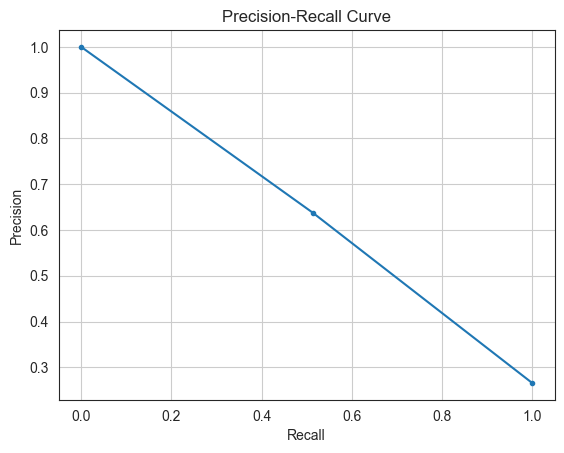

In [174]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# compute precision and recall scores
precision, recall, _ = precision_recall_curve(y_test, y_pred_test)

# plot 
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()


### Hand-written digits data set

Let's play with a famous data-set in Machine Learning. We want to predict the digits from their hand-written images. These data-set contains $8 \times 8$ images of hand-written digits.

In [175]:
# The digits dataset: we can load it directly from sklearn
digits = datasets.load_digits()


In [176]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

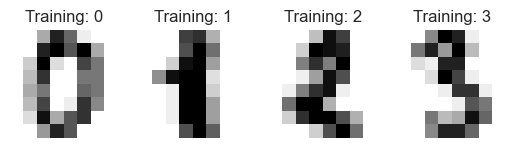

In [177]:
# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)


In [178]:
digits.images.shape

(1797, 8, 8)

Looking at the images data, we can see that it is a 3-dimensional matrix. Therefore to apply a classifier on this data, we need to flatten the image, to turn the data into a (samples, feature) matrix. You can do it by using `np.reshape` from numpy package.

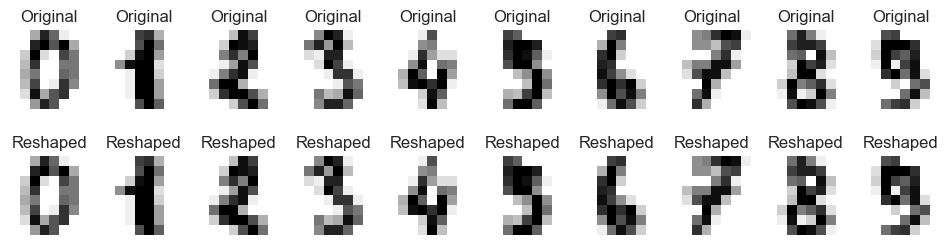

In [179]:
# reshaping
num_images = len(digits.images)
reshaped_images = digits.images.reshape((num_images, -1))

# Plot the original and reshaped images
fig, axes = plt.subplots(2, 10, figsize=(12, 3))
for i, ax in enumerate(axes[0]):
    ax.imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation='nearest')
    ax.axis('off')
    ax.set_title('Original')
for i, ax in enumerate(axes[1]):
    ax.imshow(reshaped_images[i].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.axis('off')
    ax.set_title('Reshaped')
plt.show()

In [180]:
# train/test split
data_train, data_test, target_train, target_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=72)
print("Training set shape:", data_train.shape, target_train.shape)
print("Testing set shape:", data_test.shape, target_test.shape)

Training set shape: (1437, 64) (1437,)
Testing set shape: (360, 64) (360,)


### Multi-class logistic regression

- Train a multi class logistic regression on this data-set

- what is the train accuracy?

- what is the test accuracy?

- what is the precision and recall for each class label?

- show the confusion matrix

In [181]:
# Logistic regression with cross-validation
'''
parameters:
solver='saga', cv=3, max_iter=2000, tol=0.001, multi_class="multinomial"
'''
parameters = {
    'solver': 'saga',
    'cv': 3,
    'max_iter': 2000,
    'tol': 0.001,
    'multi_class': 'multinomial'
}
log_reg_cv = LogisticRegressionCV(**parameters)

# fit the model to the training data
log_reg_cv.fit(data_train, target_train)

print("Best value of C:", log_reg_cv.C_)


Best value of C: [0.00599484 0.00599484 0.00599484 0.00599484 0.00599484 0.00599484
 0.00599484 0.00599484 0.00599484 0.00599484]


In [182]:
# train accuracy
train_accuracy = log_reg_cv.score(data_train, target_train)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.988169798190675


In [183]:
# test accuracy
test_accuracy = log_reg_cv.score(data_test, target_test)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9722222222222222


_Classification report_ gives you the precision and recall for each target class. (more about classification report [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html))

In [184]:
from sklearn.metrics import classification_report
report = classification_report(target_test, log_reg_cv.predict(data_test))
print(report)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.94      0.97      0.95        32
           2       1.00      1.00      1.00        41
           3       1.00      0.97      0.98        30
           4       0.97      0.97      0.97        32
           5       0.97      0.89      0.93        36
           6       0.97      1.00      0.99        39
           7       1.00      1.00      1.00        31
           8       0.97      0.95      0.96        38
           9       0.91      0.98      0.94        41

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



And finally the confusion matrix. Take a look at [this](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py) example and try to visualize the confusion matrix.

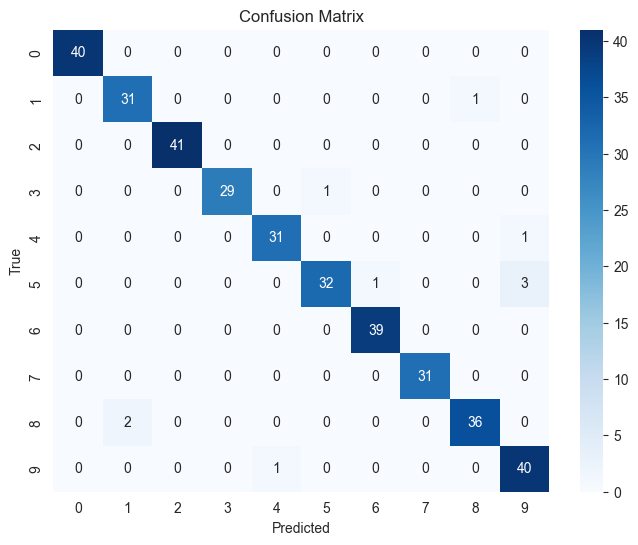

In [185]:
# confusion matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix
import seaborn as sns

# confusion matrix
conf_matrix = confusion_matrix(target_test, log_reg_cv.predict(data_test))

# class labels
classes = unique_labels(target_test, log_reg_cv.predict(data_test))

# plot
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### bonus! check if the predictions are correct for some examples of the images in the test set

Use `plt.imshow` to visualize an image with matplotlib.

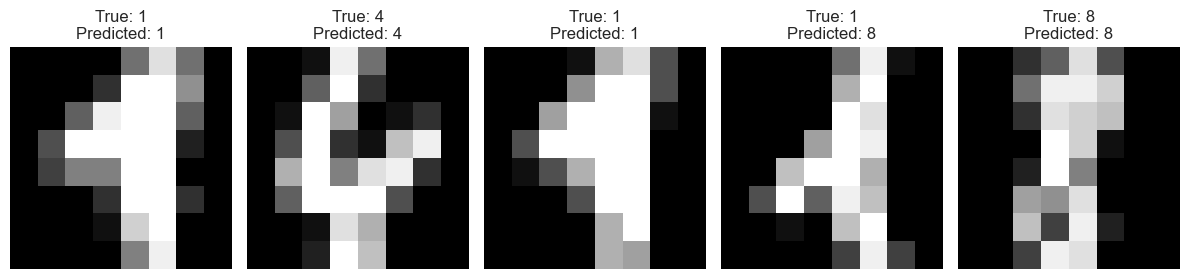

In [186]:
num_examples = 5
random_indices = np.random.choice(len(data_test), size=num_examples, replace=False)
random_images = data_test[random_indices]
random_true_labels = target_test[random_indices]
random_predicted_labels = log_reg_cv.predict(random_images)

# plot the random examples along with their true and predicted labels
plt.figure(figsize=(12, 4))
for i in range(num_examples):
    plt.subplot(1, num_examples, i + 1)
    plt.imshow(random_images[i].reshape(8, 8), cmap='gray')
    plt.title(f'True: {random_true_labels[i]}\nPredicted: {random_predicted_labels[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()